<img src="logo.jpg" width=60 height=60 align='center' />
<h1 align="center">CENSO EDUCAÇÃO SUPERIOR 2016 </h1>

**Objetivo**: explorar [base de dados](http://inep.gov.br/microdados) do censo da educação superior de 2016.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#para selecionar linhas aleatórias do dataframe
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
plt.style.use('seaborn-colorblind')

# Análise individual dos Arquivos
São 5 arquivos disponibilizados no Censo da Educação Superior:
* DM_ALUNO.CSV
* DM_CURSO.CSV
* DM_DOCENTE.CSV
* DM_IES.CSV
* DM_LOCAL_OFERTA.CSV

Eu gosto de começar análises do mais global para o mais específico, então, vou realizar a análise na ordem: locais, IES, cursos, docentes e alunos.

## 1. Local de Oferta

In [4]:
local = pd.read_csv('DM_LOCAL_OFERTA.CSV',encoding= 'latin-1', sep='|')
local.shape

(208113, 16)

In [5]:
local.tail()

,CO_LOCAL_OFERTA,NO_LOCAL_OFERTA,CO_IES,CO_UF_LOCAL_OFERTA,SGL_UF_LOCAL_OFERTA,CO_MUNICIPIO_LOCAL_OFERTA,NO_MUNICIPIO_LOCAL_OFERTA,IN_SEDE,CO_CURSO_POLO,CO_CURSO,IN_LOCAL_OFERTA_NEAD,IN_LOCAL_OFERTA_UAB,IN_LOCAL_OFERTA_REITORIA,IN_LOCAL_OFERTA_POLO,IN_LOCAL_OFERTA_UNID_ACADEMICA,DT_INICIO_FUNCIONAMENTO
208108,1081333,Itapira,19864,35,SP,3522604,Itapira,NaN,NaN,1371340,0,0,1,0,1,05/02/2015
208109,1072324,Campus Principal,20478,35,SP,3547304,Santana de Parnaíba,1.0,NaN,1323760,0,0,1,0,1,03/02/2015
208110,1073876,Campus Principal,21095,33,RJ,3304201,Resende,1.0,NaN,1332818,0,0,1,0,1,23/04/1952
208111,1074086,Campus Principal,21206,33,RJ,3304557,Rio de Janeiro,1.0,NaN,1333000,0,0,1,0,1,02/02/2015
208112,1076995,Campus Principal,21713,35,SP,3543402,Ribeirão Preto,NaN,NaN,1386426,0,0,1,0,1,NaN


In [6]:
local.columns

Index(['CO_LOCAL_OFERTA', 'NO_LOCAL_OFERTA', 'CO_IES', 'CO_UF_LOCAL_OFERTA',
       'SGL_UF_LOCAL_OFERTA', 'CO_MUNICIPIO_LOCAL_OFERTA',
       'NO_MUNICIPIO_LOCAL_OFERTA', 'IN_SEDE', 'CO_CURSO_POLO', 'CO_CURSO',
       'IN_LOCAL_OFERTA_NEAD', 'IN_LOCAL_OFERTA_UAB',
       'IN_LOCAL_OFERTA_REITORIA', 'IN_LOCAL_OFERTA_POLO',
       'IN_LOCAL_OFERTA_UNID_ACADEMICA', 'DT_INICIO_FUNCIONAMENTO'],
      dtype='object')

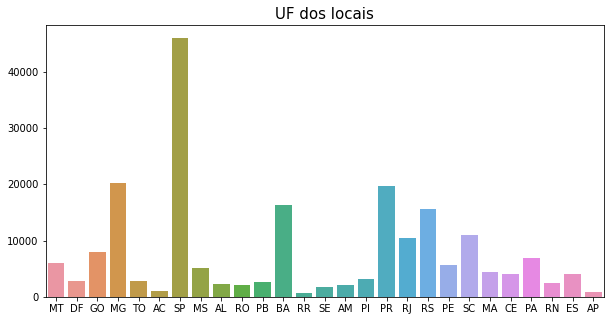

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(local['SGL_UF_LOCAL_OFERTA'])
plt.title('UF dos locais', size=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

Como era esperado, a UF com maior número de unidades de oferta é São Paulo, seguido por Minas Gerais, Paraná, Bahia e Rio Grande do Sul.

In [8]:
print('São',local.CO_LOCAL_OFERTA.nunique(),'locais de oferta distintos em',local.NO_MUNICIPIO_LOCAL_OFERTA.nunique(),'municípios das',local.CO_UF_LOCAL_OFERTA.nunique(),'diferentes UFs Brasileiras')
print('Considerando que o Brasil possui 5570 municípios, podemos afirmar que apenas',round(local.NO_MUNICIPIO_LOCAL_OFERTA.nunique()/5570*100,2),'% dos municípios tem polos de educação superior')

São 12553 locais de oferta distintos em 1939 municípios das 27 diferentes UFs Brasileiras
Considerando que o Brasil possui 5570 municípios, podemos afirmar que apenas 34.81 % dos municípios tem polos de educação superior


In [9]:
tipo = local[['IN_LOCAL_OFERTA_NEAD', 'IN_LOCAL_OFERTA_UAB','IN_LOCAL_OFERTA_REITORIA', 
              'IN_LOCAL_OFERTA_POLO','IN_LOCAL_OFERTA_UNID_ACADEMICA']]
tipo.sum()

IN_LOCAL_OFERTA_NEAD                6593
IN_LOCAL_OFERTA_UAB                 9866
IN_LOCAL_OFERTA_REITORIA           21934
IN_LOCAL_OFERTA_POLO              178091
IN_LOCAL_OFERTA_UNID_ACADEMICA     57929
dtype: int64

É interessante observar que esses locais de oferta podem possuir tanto Núcleos de Educação a Distância (NEAD), Polo Universidade Aberta do Brasil (UAB), Unidade Administrativa/Reitoria, Polo de apoio presencial ou Unidades Acadêmicas, como uma combinação desses, sendo o número de polos de apoio presenciais em maior número.

## 2. IES

In [10]:
ies = pd.read_csv('DM_IES.CSV',encoding= 'latin-1', sep='|')
ies.shape

(2407, 50)

In [11]:
ies.tail(3)

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_RECEITA_PROPRIA,VL_TRANSFERENCIA,VL_OUTRA_RECEITA,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS
2404,3876,Faculdade Unyleya,NaN,16674,UNYEAD EDUCACIONAL S.A.,4,Privada com fins lucrativos,3,Faculdade,3304557,...,2267017.94,0.000000e+00,0.000000e+00,7.999205e+05,3.728066e+05,663353.45,202058.84,0.00,103895.01,0.00
2405,609,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,UNIOESTE,16798,UNIVERSIDADE ESTADUAL DO OESTE DO PARANA,2,Pública Estadual,1,Universidade,4104808,...,38670342.60,4.445815e+08,1.221239e+07,2.143275e+08,2.168282e+08,0.00,68278773.64,8806995.51,0.00,0.00
2406,3184,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",IFRR,16809,"INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNO...",1,Pública Federal,4,"Instituto Federal de Educação, Ciência e Tecno...",1400100,...,145653.14,4.097262e+06,1.439142e+08,6.202429e+07,0.000000e+00,6537842.20,18814086.37,10396218.18,901120.96,19369758.25


In [12]:
ies.columns

Index(['CO_IES', 'NO_IES', 'SGL_IES', 'CO_MANTENEDORA', 'NO_MANTENEDORA',
       'CO_CATEGORIA_ADMINISTRATIVA', 'DS_CATEGORIA_ADMINISTRATIVA',
       'CO_ORGANIZACAO_ACADEMICA', 'DS_ORGANIZACAO_ACADEMICA',
       'CO_MUNICIPIO_IES', 'NO_MUNICIPIO_IES', 'CO_UF_IES', 'SGL_UF_IES',
       'NO_REGIAO_IES', 'IN_CAPITAL_IES', 'QT_TEC_TOTAL',
       'QT_TEC_FUND_INCOMP_FEM', 'QT_TEC_FUND_INCOMP_MASC',
       'QT_TEC_FUND_COMP_FEM', 'QT_TEC_FUND_COMP_MASC', 'QT_TEC_MEDIO_FEM',
       'QT_TEC_MEDIO_MASC', 'QT_TEC_SUPERIOR_FEM', 'QT_TEC_SUPERIOR_MASC',
       'QT_TEC_ESPECIALIZACAO_FEM', 'QT_TEC_ESPECIALIZACAO_MASC',
       'QT_TEC_MESTRADO_FEM', 'QT_TEC_MESTRADO_MASC', 'QT_TEC_DOUTORADO_FEM',
       'QT_TEC_DOUTORADO_MASC', 'IN_ACESSO_PORTAL_CAPES',
       'IN_ACESSO_OUTRAS_BASES', 'IN_REPOSITORIO_INSTITUCIONAL',
       'IN_BUSCA_INTEGRADA', 'IN_SERVICO_INTERNET', 'IN_PARTICIPA_REDE_SOCIAL',
       'IN_CATALOGO_ONLINE', 'QT_PERIODICO_ELETRONICO', 'QT_LIVRO_ELETRONICO',
       'IN_REFERENTE', 'V

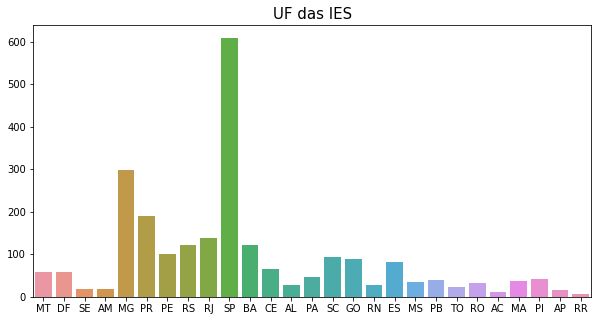

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(ies['SGL_UF_IES'])
plt.title('UF das IES', size=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

Novamente, como esperado, a UF com maior número de Instituições de Ensino Superior é São Paulo, seguido por Minas Gerais e Paraná.

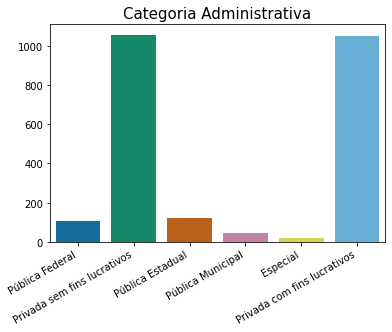

In [14]:
sns.countplot(ies['DS_CATEGORIA_ADMINISTRATIVA'])
plt.title('Categoria Administrativa', size=15)
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [15]:
ies['DS_CATEGORIA_ADMINISTRATIVA'].value_counts()

Privada sem fins lucrativos    1059
Privada com fins lucrativos    1052
Pública Estadual                123
Pública Federal                 107
Pública Municipal                45
Especial                         21
Name: DS_CATEGORIA_ADMINISTRATIVA, dtype: int64

Das 2.407 IES cadastradas, a enorme maioria dessas são privadas, com fins lucrativos (1.052) ou sem fins lucrativos (1.059). O número de IES públicas federais me surpreendeu: apenas 107.

In [16]:
ies['DS_ORGANIZACAO_ACADEMICA'].value_counts()

Faculdade                                              2004
Universidade                                            197
Centro Universitário                                    166
Instituto Federal de Educação, Ciência e Tecnologia      38
Centro Federal de Educação Tecnológica                    2
Name: DS_ORGANIZACAO_ACADEMICA, dtype: int64

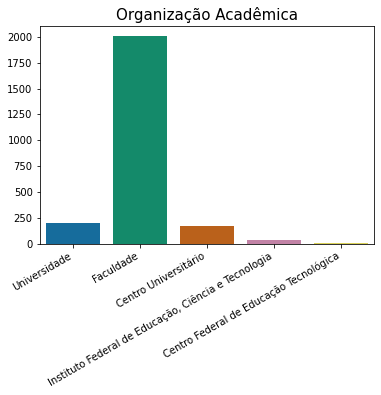

In [17]:
sns.countplot(ies['DS_ORGANIZACAO_ACADEMICA'])
plt.title('Organização Acadêmica', size=15)
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("")
plt.show()

A maior parte dessas IES são Faculdades (2.004): focadas em determinadas áreas do conhecimento. São apenas 197 Universidades, espaços que concentram três eixos de atividades acadêmicas: Ensino, Pesquisa e Extensão.

In [18]:
tecnicos = ies[['QT_TEC_FUND_INCOMP_FEM', 'QT_TEC_FUND_INCOMP_MASC',
                'QT_TEC_FUND_COMP_FEM', 'QT_TEC_FUND_COMP_MASC', 
                'QT_TEC_MEDIO_FEM','QT_TEC_MEDIO_MASC', 
                'QT_TEC_SUPERIOR_FEM', 'QT_TEC_SUPERIOR_MASC',
                'QT_TEC_ESPECIALIZACAO_FEM', 'QT_TEC_ESPECIALIZACAO_MASC',
                'QT_TEC_MESTRADO_FEM', 'QT_TEC_MESTRADO_MASC', 
                'QT_TEC_DOUTORADO_FEM','QT_TEC_DOUTORADO_MASC']]

tecnicos.sum()

QT_TEC_FUND_INCOMP_FEM         7925
QT_TEC_FUND_INCOMP_MASC       12892
QT_TEC_FUND_COMP_FEM          11802
QT_TEC_FUND_COMP_MASC         15730
QT_TEC_MEDIO_FEM              73299
QT_TEC_MEDIO_MASC             72360
QT_TEC_SUPERIOR_FEM           70345
QT_TEC_SUPERIOR_MASC          49880
QT_TEC_ESPECIALIZACAO_FEM     48196
QT_TEC_ESPECIALIZACAO_MASC    29994
QT_TEC_MESTRADO_FEM           16560
QT_TEC_MESTRADO_MASC          12095
QT_TEC_DOUTORADO_FEM           3979
QT_TEC_DOUTORADO_MASC          3370
dtype: int64

In [19]:
print('São',tecnicos.sum().sum(),'funcionários técnico-administrativos trabalhando nessas IES')

São 428427 funcionários técnico-administrativos trabalhando nessas IES


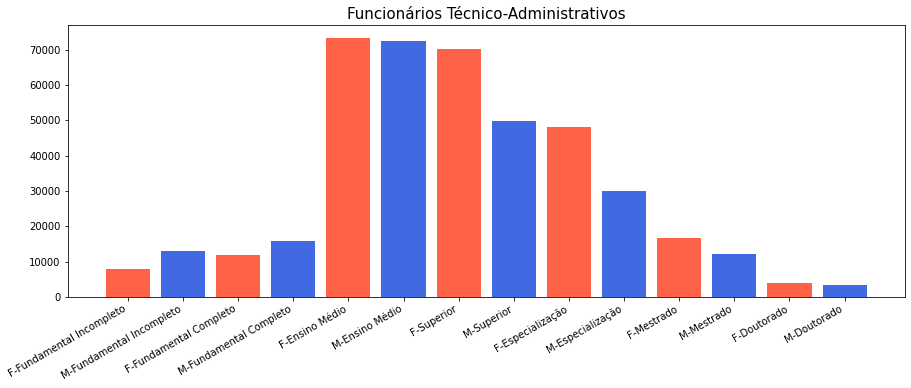

In [20]:
cor=['#FF6347','#4169E1']*7

plt.figure(figsize=(15,5))
plt.bar(x= ['F-Fundamental Incompleto', 'M-Fundamental Incompleto',
            'F-Fundamental Completo', 'M-Fundamental Completo', 
            'F-Ensino Médio','M-Ensino Médio', 
            'F-Superior', 'M-Superior',
            'F-Especialização', 'M-Especialização',
            'F-Mestrado', 'M-Mestrado', 
            'F-Doutorado','M-Doutorado'], height=list(tecnicos.sum()), color=cor)

plt.title('Funcionários Técnico-Administrativos', size=15)
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("")
plt.show()

A maior parte dos funcionários tem Ensino Médio Completo. Existem menos mulheres que homens com escolaridade até fundamental completo, depois (de ensino médio até doutorado), temos mais funcionárias que funcionários.

In [21]:
dinheiro = ['VL_RECEITA_PROPRIA', 'VL_TRANSFERENCIA','VL_OUTRA_RECEITA',
            'VL_DES_PESSOAL_REM_DOCENTE','VL_DES_PESSOAL_REM_TECNICO', 'VL_DES_PESSOAL_ENCARGO',
            'VL_DES_CUSTEIO', 'VL_DES_INVESTIMENTO', 'VL_DES_PESQUISA','VL_DES_OUTRAS']

financeiro = ies[dinheiro]

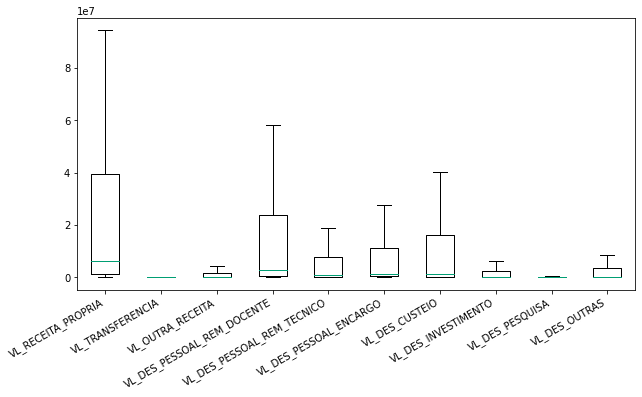

In [22]:
#definindo os valores de y como cada coluna do financeiro
y=[]
for i in dinheiro:
    y.append(financeiro[i])

#plotar
plt.figure(figsize=(10,5))

plt.boxplot(y, sym='')
plt.xticks(ticks=range(1,len(dinheiro)+1), labels=dinheiro, rotation=30, ha='right')
plt.show()

A maior parte das receitas das IES é própria (auferidas pela Mantenedora ou pela IES) e a maior parte das despesas é com docentes ativos da IES ou da mantenedora e despesas para a manutenção e custeio da IES ou da mantenedora

In [23]:
#ver se as receitas são maiores que as despesas
receitas = ies[['VL_RECEITA_PROPRIA', 'VL_TRANSFERENCIA','VL_OUTRA_RECEITA']]
despesas = ies[['VL_DES_PESSOAL_REM_DOCENTE','VL_DES_PESSOAL_REM_TECNICO', 'VL_DES_PESSOAL_ENCARGO',
                'VL_DES_CUSTEIO', 'VL_DES_INVESTIMENTO', 'VL_DES_PESQUISA','VL_DES_OUTRAS']]

print('A diferença entre as receitas e despesas de todas as IES é de R$%.2f' %(receitas.sum().sum()-despesas.sum().sum()))

A diferença entre as receitas e despesas de todas as IES é de R$92679451139.86


In [24]:
receitas.sum()

VL_RECEITA_PROPRIA    3.453293e+11
VL_TRANSFERENCIA      1.124540e+11
VL_OUTRA_RECEITA      5.744453e+10
dtype: float64

In [25]:
despesas.sum()

VL_DES_PESSOAL_REM_DOCENTE    1.234256e+11
VL_DES_PESSOAL_REM_TECNICO    4.806705e+10
VL_DES_PESSOAL_ENCARGO        7.069693e+10
VL_DES_CUSTEIO                1.027663e+11
VL_DES_INVESTIMENTO           2.356429e+10
VL_DES_PESQUISA               3.711660e+09
VL_DES_OUTRAS                 5.031652e+10
dtype: float64

In [26]:
ies.groupby('DS_CATEGORIA_ADMINISTRATIVA')['VL_RECEITA_PROPRIA'].sum().sort_values(ascending=False)

DS_CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    2.283393e+11
Privada sem fins lucrativos    1.067202e+11
Pública Estadual               5.815550e+09
Pública Federal                2.934474e+09
Especial                       8.394047e+08
Pública Municipal              6.803341e+08
Name: VL_RECEITA_PROPRIA, dtype: float64

In [27]:
ies.groupby('DS_CATEGORIA_ADMINISTRATIVA')['VL_DES_PESSOAL_REM_DOCENTE'].sum().sort_values(ascending=False)

DS_CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    4.217990e+10
Pública Estadual               3.264251e+10
Privada sem fins lucrativos    2.572629e+10
Pública Federal                2.231163e+10
Especial                       3.492198e+08
Pública Municipal              2.160415e+08
Name: VL_DES_PESSOAL_REM_DOCENTE, dtype: float64

In [28]:
ies.groupby('DS_CATEGORIA_ADMINISTRATIVA')['VL_DES_PESSOAL_REM_DOCENTE'].mean().sort_values(ascending=False)

DS_CATEGORIA_ADMINISTRATIVA
Pública Estadual               2.653862e+08
Pública Federal                2.085199e+08
Privada com fins lucrativos    4.009496e+07
Privada sem fins lucrativos    2.429300e+07
Especial                       1.662951e+07
Pública Municipal              4.800921e+06
Name: VL_DES_PESSOAL_REM_DOCENTE, dtype: float64

Como era de se imaginar as IES privadas são as que possuem maior receita própria. E, para minha surpresa, as IES que tem maior custo médio com remuneração de docentes ativos ou na mantenedora são as IES públicas estaduais, sendo as públicas municipais com a menor despesa média.

## 3. Cursos

In [29]:
cursos = pd.read_csv('DM_CURSO.CSV',encoding= 'latin-1', sep='|')

In [30]:
cursos.shape

(34695, 96)

In [31]:
cursos.head(2)

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_LOCAL_OFERTA_CURSO,CO_MUNICIPIO_CURSO,NO_MUNICIPIO_CURSO,CO_UF_CURSO,...,QT_VAGAS_PROG_ESP_INTEGRAL,QT_VAGAS_PROG_ESP_MATUTINO,QT_VAGAS_PROG_ESP_VESPERTINO,QT_VAGAS_PROG_ESP_NOTURNO,QT_VAGAS_PROG_ESP_EAD,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,QT_INGRESSO_VAGAS_NOVAS,QT_VAGAS_TOTAIS
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,0.0,NaN,432.0,66.0,91.0,89.0,90
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,105340.0,5103403.0,Cuiabá,51.0,...,NaN,0.0,NaN,0.0,NaN,391.0,63.0,103.0,103.0,106


In [32]:
#Com base no Dicionário já decidi eliminar algumas colunas:
to_drop = ['CO_IES', 'CO_CATEGORIA_ADMINISTRATIVA','CO_ORGANIZACAO_ACADEMICA','CO_LOCAL_OFERTA_CURSO',
           'CO_MUNICIPIO_CURSO', 'CO_UF_CURSO', 'CO_CURSO','CO_SITUACAO_CURSO', 'DS_SITUACAO_CURSO', 'CO_OCDE',
           'CO_OCDE_AREA_GERAL','CO_OCDE_AREA_ESPECIFICA','CO_OCDE_AREA_DETALHADA', 'NO_OCDE_AREA_DETALHADA', 
           'CO_GRAU_ACADEMICO','CO_MODALIDADE_ENSINO','CO_NIVEL_ACADEMICO','TP_ATRIBUTO_INGRESSO', 
           'IN_INTEGRAL_CURSO', 'IN_MATUTINO_CURSO', 'IN_VESPERTINO_CURSO','IN_NOTURNO_CURSO', 
           'NU_INTEGRALIZACAO_INTEGRAL','NU_INTEGRALIZACAO_MATUTINO', 'NU_INTEGRALIZACAO_VESPERTINO',
           'NU_INTEGRALIZACAO_NOTURNO', 'NU_INTEGRALIZACAO_EAD','IN_OFERECE_DISC_SEMI_PRES', 
           'NU_PERC_CAR_HOR_SEMI_PRES']

cursos.drop(to_drop, axis=1, inplace=True)

In [33]:
print('São',cursos.shape[0],'cursos cadastrados em',cursos.NO_IES.nunique(),'IES')

São 34695 cursos cadastrados em 2375 IES


In [34]:
# Ótimo, não surgiu nenhuma IES que eu não tinha antes.
ies.NO_IES.nunique() == cursos.NO_IES.nunique()

True

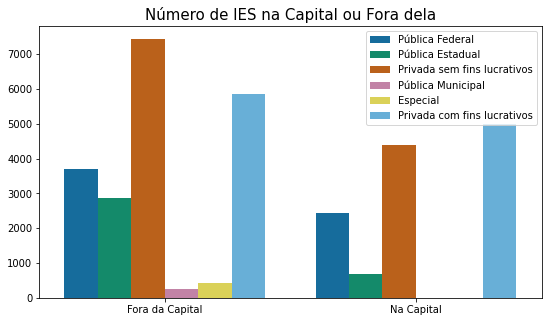

In [35]:
plt.figure(figsize=(9, 5))

sns.countplot(cursos['IN_CAPITAL_CURSO'], orient='h', hue=cursos['DS_CATEGORIA_ADMINISTRATIVA'])
plt.title('Número de IES na Capital ou Fora dela', size=15)
plt.legend(loc='best')
plt.xticks(ticks=[0,1], labels=['Fora da Capital','Na Capital'])
plt.xlabel("")
plt.ylabel("")
plt.show()

In [36]:
# como o valor 1 se refere ao valor se o curso está na capital, quando eu faço a soma desses valores 
# eu obtenho o número de cursos na capital pela categoria administrativa
cursos.groupby('DS_CATEGORIA_ADMINISTRATIVA')['IN_CAPITAL_CURSO'].sum().sort_values(ascending=False)

DS_CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    4986.0
Privada sem fins lucrativos    4397.0
Pública Federal                2425.0
Pública Estadual                673.0
Pública Municipal                 1.0
Especial                          1.0
Name: IN_CAPITAL_CURSO, dtype: float64

É interessante observar que nas capitais existem quantidades insignificantes de IES públicas municipais e de IES especiais, sendo estas concentradas nas cidades menores. O número de IES nas capitais é menor porque o número de capitais é menor que o número total de municípios.

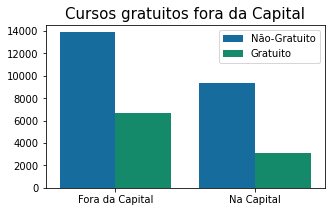

In [37]:
plt.figure(figsize=(5, 3))

sns.countplot(cursos['IN_CAPITAL_CURSO'], hue=cursos['IN_GRATUITO'])
plt.title('Cursos gratuitos fora da Capital', size=15)
plt.legend(loc='best')
plt.xticks(ticks=[0,1], labels=['Fora da Capital','Na Capital'])
plt.legend(['Não-Gratuito','Gratuito'])
plt.xlabel("")
plt.ylabel("")
plt.show()

A maior parte dos cursos gratuitos estão fora das capitais, o que é bom, já que a renda média dos moradores das capitais costuma ser mais elevada. Porém, infelizmente, existem mais cursos não-gratuitos que cursos gratuitos.

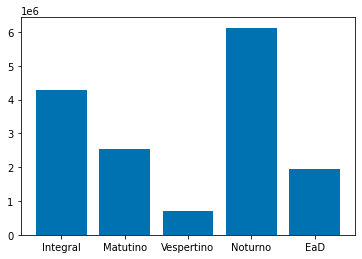

In [38]:
#Maior número de vagas no período noturno - imagino nas faculdades particulares
x = ['Integral', 'Matutino', 'Vespertino', 'Noturno', 'EaD']
y1 = [cursos.QT_INSC_VAGAS_NOVAS_INT.sum(), cursos.QT_INSC_VAGAS_NOVAS_MAT.sum(),
    cursos.QT_INSC_VAGAS_NOVAS_VESP.sum(), cursos.QT_INSC_VAGAS_NOVAS_NOT.sum(),
    cursos.QT_INSC_VAGAS_NOVAS_EAD.sum()]

plt.bar(x,y1);

In [39]:
cursos.groupby('DS_CATEGORIA_ADMINISTRATIVA')['QT_INSC_VAGAS_NOVAS_NOT'].sum().sort_values(ascending=False)

DS_CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    2103360.0
Pública Federal                1953511.0
Privada sem fins lucrativos    1449037.0
Pública Estadual                566674.0
Pública Municipal                26416.0
Especial                         24905.0
Name: QT_INSC_VAGAS_NOVAS_NOT, dtype: float64

Como eu imaginei, o maior número de vagas noturnas está concentrada nas IES privadas, com fins lucrativos

In [40]:
print('São',round(cursos.QT_INSC_VAGAS_NOVAS_INT.sum()/cursos.QT_VAGAS_NOVAS_INTEGRAL.sum(),2),'inscrições por vaga no período integral')
print('São',round(cursos.QT_INSC_VAGAS_NOVAS_MAT.sum()/cursos.QT_VAGAS_NOVAS_MATUTINO.sum(),2),'inscrições por vaga no período matutino')
print('São',round(cursos.QT_INSC_VAGAS_NOVAS_VESP.sum()/cursos.QT_VAGAS_NOVAS_VESPERTINO.sum(),2),'inscrições por vaga no período vespertino')
print('São',round(cursos.QT_INSC_VAGAS_NOVAS_NOT.sum()/cursos.QT_VAGAS_NOVAS_NOTURNO.sum(),2),'inscrições por vaga no período noturno')
print('São',round(cursos.QT_INSC_VAGAS_NOVAS_EAD.sum()/cursos.QT_VAGAS_NOVAS_EAD.sum(),2),'inscrições por vaga no EaD')

São 15.21 inscrições por vaga no período integral
São 2.56 inscrições por vaga no período matutino
São 5.5 inscrições por vaga no período vespertino
São 2.4 inscrições por vaga no período noturno
São 0.49 inscrições por vaga no EaD


Em quase todas as modalidades, existe mais demanda que vaga, o que era esperado.

Única modalidade que não tem todas as vagas preenchidas é a de EaD, provavelmente pela dificuldade de acesso à computadores e internet

In [41]:
# Observar os recursos de cada curso
recursos = cursos[['IN_AJUDA_DEFICIENTE', 'IN_MATERIAL_DIGITAL', 'IN_MATERIAL_AMPLIADO',
       'IN_MATERIAL_TATIL', 'IN_MATERIAL_IMPRESSO', 'IN_MATERIAL_AUDIO',
       'IN_MATERIAL_BRAILLE', 'IN_MATERIAL_LIBRAS', 'IN_DISCIPLINA_LIBRAS',
       'IN_TRADUTOR_LIBRAS', 'IN_GUIA_INTERPRETE', 'IN_RECURSOS_COMUNICACAO',
       'IN_RECURSOS_INFORMATICA', 'IN_POSSUI_LABORATORIO']]

round(recursos.sum()/recursos.shape[0]*100,2)

IN_AJUDA_DEFICIENTE        88.79
IN_MATERIAL_DIGITAL        50.34
IN_MATERIAL_AMPLIADO       43.17
IN_MATERIAL_TATIL          28.18
IN_MATERIAL_IMPRESSO       49.13
IN_MATERIAL_AUDIO          38.71
IN_MATERIAL_BRAILLE        33.49
IN_MATERIAL_LIBRAS         43.49
IN_DISCIPLINA_LIBRAS       76.47
IN_TRADUTOR_LIBRAS         59.36
IN_GUIA_INTERPRETE         31.17
IN_RECURSOS_COMUNICACAO    53.50
IN_RECURSOS_INFORMATICA    64.13
IN_POSSUI_LABORATORIO      90.34
dtype: float64

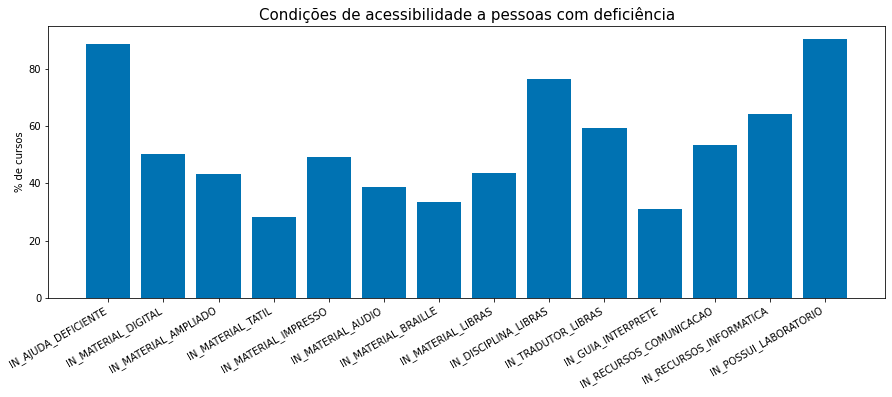

In [42]:
plt.figure(figsize=(15,5))
plt.bar(x= ['IN_AJUDA_DEFICIENTE', 'IN_MATERIAL_DIGITAL', 'IN_MATERIAL_AMPLIADO',
       'IN_MATERIAL_TATIL', 'IN_MATERIAL_IMPRESSO', 'IN_MATERIAL_AUDIO',
       'IN_MATERIAL_BRAILLE', 'IN_MATERIAL_LIBRAS', 'IN_DISCIPLINA_LIBRAS',
       'IN_TRADUTOR_LIBRAS', 'IN_GUIA_INTERPRETE', 'IN_RECURSOS_COMUNICACAO',
       'IN_RECURSOS_INFORMATICA', 'IN_POSSUI_LABORATORIO'], 
        height=recursos.sum()/recursos.shape[0]*100)

plt.title('Condições de acessibilidade a pessoas com deficiência', size=15)
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("% de cursos")
plt.show()

Apesar de alguns valores ainda serem bastante baixos (audio, braille, material tatil e interprete), confesso que fiquei positivamente surpresa com esse resultado, porém fico curiosa para entender como os dados são coletados: se for uma autodeclaração da IES talvez esses valores sejam superestimados.

In [43]:
cursos.NO_OCDE_AREA_GERAL.value_counts()

Ciências sociais, negócios e direito    10255
Educação                                 7378
Engenharia, produção e construção        5363
Saúde e bem estar social                 4364
Ciências, matemática e computação        3331
Humanidades e artes                      1570
Serviços                                 1164
Agricultura e veterinária                1015
Name: NO_OCDE_AREA_GERAL, dtype: int64

In [44]:
cursos.NO_OCDE.value_counts().head(6)

Administração         2128
Pedagogia             1646
Ciências contábeis    1306
Direito               1184
Enfermagem             953
Engenharia civil       861
Name: NO_OCDE, dtype: int64

É interessante observar que os cursos mais ofertados estão na área de Ciências sociais, negócios e direito e Educação, sendo o curso mais ofertado de Adminstração.

## 4. Docentes

In [45]:
docentes = pd.read_csv('DM_DOCENTE.CSV',encoding= 'latin-1', sep='|')
docentes.shape

(397611, 50)

In [46]:
docentes.head(3)

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,IN_CAPITAL_IES,CO_DOCENTE_IES,CO_DOCENTE,CO_SITUACAO_DOCENTE,...,IN_ATU_GRAD_PRESENCIAL,IN_ATU_POS_EAD,IN_ATU_POS_PRESENCIAL,IN_ATU_SEQUENCIAL,IN_ATU_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DT_REF,IN_VISITANTE,IN_VISITANTE_IFES_VINCULO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559840,669,1,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559841,670,1,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,559839,719,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN


In [47]:
docentes.NO_IES.nunique() == cursos.NO_IES.nunique()

True

In [48]:
print("São",docentes.shape[0],'atuando em',docentes.NO_IES.nunique(),'IES')
print("Isso dá uma média de",round(docentes.shape[0]/docentes.NO_IES.nunique(),2),"docentes por IES")

São 397611 atuando em 2375 IES
Isso dá uma média de 167.42 docentes por IES


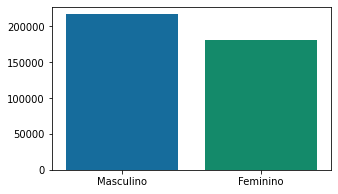

In [49]:
plt.figure(figsize=(5,3))
sns.countplot(docentes['DS_SEXO_DOCENTE'])
plt.xlabel("")
plt.ylabel("");

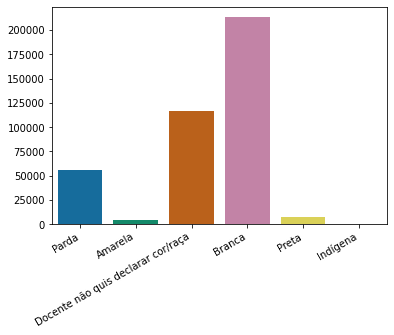

In [50]:
sns.countplot(docentes['DS_COR_RACA_DOCENTE'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("");

Existe um número muito pequeno de docentes negros - o que é possível observar na realidade brasileira, sendo o de indígenas menor ainda. Porém, esse valor também pode estar subestimado por estar escondido nos valores de docentes que preferiram não declarar raça, ou até mesmo nos valores de declaração de pardos.

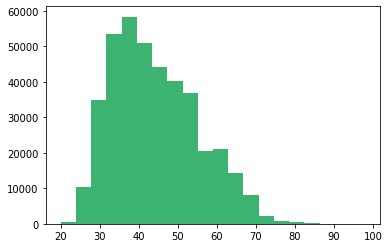

In [51]:
plt.hist(docentes['NU_IDADE_DOCENTE'], bins=20, color='#3CB371');

A maior parte dos docentes tem entre 30 e 40 anos. E existem docentes com mais de 80 anos (!)

In [52]:
docentes['DS_ESCOLARIDADE_DOCENTE'].value_counts()

Mestrado          157405
Doutorado         153021
Especialização     81290
Graduação           5875
Sem Graduação         20
Name: DS_ESCOLARIDADE_DOCENTE, dtype: int64

In [53]:
# Ok, não existem valores duplicados, ou seja, uma pessoa com mestrado e doutorado ser contada nas duas categorias
docentes.shape[0] == docentes['DS_ESCOLARIDADE_DOCENTE'].value_counts().sum()

True

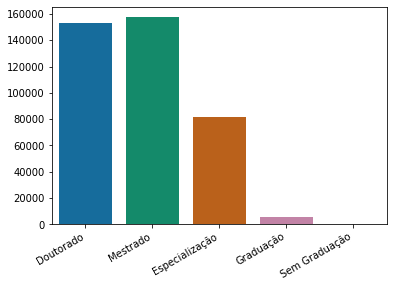

In [54]:
sns.countplot(docentes['DS_ESCOLARIDADE_DOCENTE'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("");

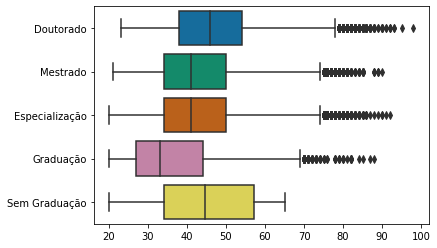

In [55]:
sns.boxplot(docentes.NU_IDADE_DOCENTE, docentes.DS_ESCOLARIDADE_DOCENTE)
plt.xlabel("")
plt.ylabel("")
plt.show()

A enorme maioria de docentes possui mestrado, seguido por grande parte com doutorado.

Existem docentes sem graduação, e eles são os docentes com uma das maiores medianas de idade, mas 50% desses docentes tem aproximadamente entre 35 e 55 anos.

In [56]:
docentes['DS_NACIONALIDADE_DOCENTE'].value_counts()

Brasileira                                          391093
Estrangeira                                           4611
Brasileira - nascido no exterior ou naturalizado      1907
Name: DS_NACIONALIDADE_DOCENTE, dtype: int64

Maioria dos docentes é brasileira

In [57]:
deficiencias = docentes[['IN_DEF_CEGUEIRA','IN_DEF_BAIXA_VISAO','IN_DEF_SURDEZ','IN_DEF_AUDITIVA',
                         'IN_DEF_FISICA','IN_DEF_SURDOCEGUEIRA','IN_DEF_MULTIPLA','IN_DEF_INTELECTUAL']]

round(deficiencias.sum()/deficiencias.shape[0]*100,2).sort_values(ascending=False)

IN_DEF_FISICA           0.19
IN_DEF_BAIXA_VISAO      0.13
IN_DEF_AUDITIVA         0.09
IN_DEF_SURDEZ           0.03
IN_DEF_CEGUEIRA         0.02
IN_DEF_MULTIPLA         0.01
IN_DEF_INTELECTUAL      0.00
IN_DEF_SURDOCEGUEIRA    0.00
dtype: float64

In [58]:
deficiencias.sum().sum()

1861.0

São cadastrados um número muito pequeno (3689) de docentes com deficiência.

In [59]:
atuacao = docentes[['IN_ATU_EAD', 'IN_ATU_EXTENSAO', 'IN_ATU_GESTAO',
       'IN_ATU_GRAD_PRESENCIAL', 'IN_ATU_POS_EAD', 'IN_ATU_POS_PRESENCIAL',
       'IN_ATU_SEQUENCIAL', 'IN_ATU_PESQUISA']]

round(atuacao.sum()/atuacao.shape[0]*100,2).sort_values(ascending=False)

IN_ATU_GRAD_PRESENCIAL    92.93
IN_ATU_PESQUISA           28.38
IN_ATU_EXTENSAO           25.61
IN_ATU_GESTAO             22.89
IN_ATU_POS_PRESENCIAL     13.52
IN_ATU_EAD                 3.52
IN_ATU_POS_EAD             0.20
IN_ATU_SEQUENCIAL          0.12
dtype: float64

A maior parte desses docentes atua em atividades de ensino em cursos de graduação presencial e uma porcentagem bem pequena atua com EaD e ensino em curso sequencial.

## 5. Alunos

Como o arquivo era muito grande e meu computador travou, decidi tirar uma amostra aleatória com 2% dos dados (das linhas) para fazer a análise (obrigada, StackOverflow!). 

In [60]:
p = 0.02  # 2% das linhas

# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv('DM_ALUNO.CSV', encoding= 'latin-1', sep='|',header=0, 
                 skiprows=lambda i: i>0 and random.random() > p)

In [61]:
df.shape

(229140, 119)

In [62]:
df.head(3)

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_CURSO,NO_CURSO,CO_CURSO_POLO,CO_TURNO_ALUNO,...,IN_MOBILIDADE_ACADEMICA,CO_MOBILIDADE_ACADEMICA,CO_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,ANO_INGRESSO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2008
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2015
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,Pública Federal,1,Universidade,1,DIREITO,NaN,3.0,...,0.0,NaN,NaN,NaN,NaN,1,0,0,0,2013


In [63]:
df.columns

Index(['CO_IES', 'NO_IES', 'CO_CATEGORIA_ADMINISTRATIVA',
       'DS_CATEGORIA_ADMINISTRATIVA', 'CO_ORGANIZACAO_ACADEMICA',
       'DS_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'NO_CURSO', 'CO_CURSO_POLO',
       'CO_TURNO_ALUNO',
       ...
       'IN_MOBILIDADE_ACADEMICA', 'CO_MOBILIDADE_ACADEMICA',
       'CO_MOBILIDADE_ACADEMICA_INTERN', 'CO_IES_DESTINO', 'CO_PAIS_DESTINO',
       'IN_MATRICULA', 'IN_CONCLUINTE', 'IN_INGRESSO_TOTAL',
       'IN_INGRESSO_VAGA_NOVA', 'ANO_INGRESSO'],
      dtype='object', length=119)

In [64]:
print('Infelizmente minha amostra não abarcou todas as IES cadastradas, tenho',df.NO_IES.nunique(),'sendo o número total de',ies.NO_IES.nunique())
print('Porém tenho',round(df.NO_IES.nunique()/ies.NO_IES.nunique()*100,2),'% das IES, o que está aceitável')

Infelizmente minha amostra não abarcou todas as IES cadastradas, tenho 2259 sendo o número total de 2375
Porém tenho 95.12 % das IES, o que está aceitável


Vou considerar que essa amostra aleatória é representativa e proporcional aos dados populacionais (o *.csv* original) para fazer as análises

In [65]:
df.NO_OCDE_AREA_GERAL.value_counts().sort_values(ascending=False).head(6)

Ciências sociais, negócios e direito    88274
Educação                                42426
Engenharia, produção e construção       35088
Saúde e bem estar social                32545
Ciências, matemática e computação       13734
Agricultura e veterinária                5798
Name: NO_OCDE_AREA_GERAL, dtype: int64

Os cursos mais cursados estão nas áreas de Ciências sociais, negócios e direito e Educação, o que tem correspondência com os cursos mais ofertados.

In [66]:
df.NO_CURSO.value_counts().sort_values(ascending=False).head(6)

DIREITO               22319
ADMINISTRAÇÃO         21832
PEDAGOGIA             18072
CIÊNCIAS CONTÁBEIS    10305
ENGENHARIA CIVIL      10005
EDUCAÇÃO FÍSICA        8801
Name: NO_CURSO, dtype: int64

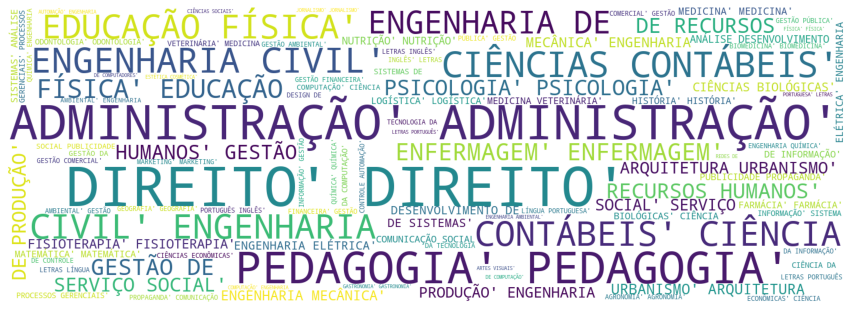

In [67]:
lista = list(df.NO_CURSO)
palavras = str(lista)
palavras = palavras.strip("'") 

wordcloud = WordCloud(max_font_size=100, width=1520, height=535, max_words=100, 
                      background_color="white").generate(palavras)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Os cursos mais cursados são direito, administração, pedagogia, ciências constábeis e engenharia civil. É interessante relembrar que os cursos são também os cursos mais ofertados (ver item cursos) são praticamente os mesmos, com a diferença para enfermagem (mais ofertado) e engenharia civil (mais cursado).

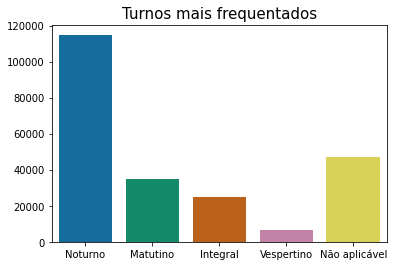

In [68]:
plt.figure(figsize=(6, 4))

sns.countplot(df['DS_TURNO_ALUNO'], orient='h')
plt.title('Turnos mais frequentados', size=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

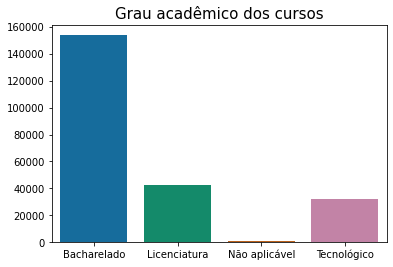

In [69]:
plt.figure(figsize=(6, 4))

sns.countplot(df['DS_GRAU_ACADEMICO'], orient='h')
plt.title('Grau acadêmico dos cursos', size=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

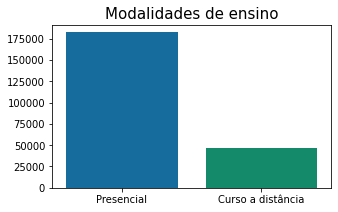

In [70]:
plt.figure(figsize=(5, 3))

sns.countplot(df['DS_MODALIDADE_ENSINO'], orient='h')
plt.title('Modalidades de ensino', size=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

A maior parte dos alunos está em bacharelados presenciais, em turno noturno!

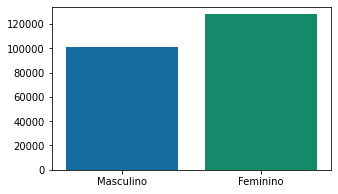

In [71]:
plt.figure(figsize=(5,3))
sns.countplot(df['DS_SEXO_ALUNO'])
plt.xlabel("")
plt.ylabel("");

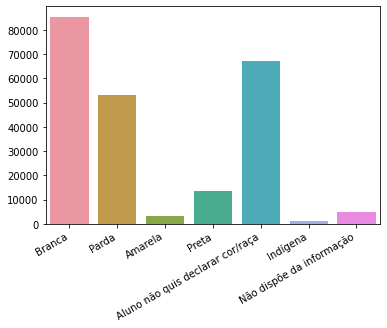

In [72]:
sns.countplot(df['DS_COR_RACA_ALUNO'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("");

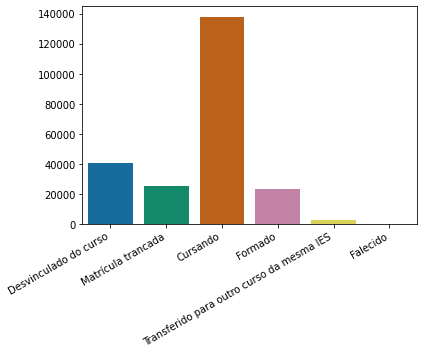

In [73]:
sns.countplot(df['DS_ALUNO_SITUACAO'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("")
plt.ylabel("");

A maior parte dos alunos é do sexo feminino (!!), branco (nada surpreendente), com um número pequeno de declarados pretos, indígena e amarelo (nada supreendente também, considerando a realidade do país). Os pardos, somados aos negros, ainda não representam mesmo valor do número de brancos (o que seria uma aproximação da proporção na sociedade).

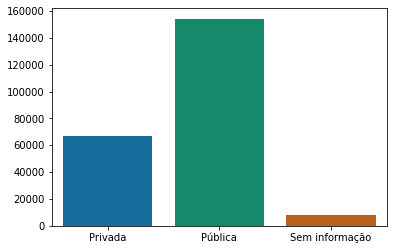

In [74]:
sns.countplot(df['CO_TIPO_ESCOLA_ENS_MEDIO'])
plt.xticks(ticks=[0,1,2], labels=['Privada','Pública','Sem informação'])
plt.xlabel("")
plt.ylabel("");

A maior parte dos alunos matriculados em IES vem escolas públicas (!!)

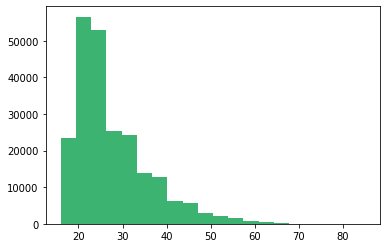

In [75]:
plt.hist(df['NU_IDADE_ALUNO'], bins=20, color='#3CB371');

Os alunos são em maioria jovens por volta de 20 anos de idade. Porém existem alunos de mais de 60 anos (!)

In [76]:
deficiencias = df[['IN_DEF_AUDITIVA','IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA',
                   'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO','IN_DEF_CEGUEIRA', 
                   'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL','IN_TGD_SINDROME_ASPERGER', 
                   'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO']]

round(deficiencias.sum()/deficiencias.shape[0]*100,2).sort_values(ascending=False)

IN_DEF_FISICA                     0.16
IN_DEF_BAIXA_VISAO                0.13
IN_DEF_AUDITIVA                   0.06
IN_DEF_CEGUEIRA                   0.03
IN_DEF_SUPERDOTACAO               0.02
IN_DEF_SURDEZ                     0.02
IN_DEF_INTELECTUAL                0.02
IN_DEF_MULTIPLA                   0.01
IN_TGD_TRANSTOR_DESINTEGRATIVO    0.00
IN_TGD_SINDROME_RETT              0.00
IN_TGD_SINDROME_ASPERGER          0.00
IN_TGD_AUTISMO_INFANTIL           0.00
IN_DEF_SURDOCEGUEIRA              0.00
dtype: float64

A porcentagem de alunos com deficiência é muito baixo, isso pode ocorrer por um baixo nível de diagnósticos, desconforto em declarações ou pode representar valores coerentes com a realidade brasileira. É necessário estudar mais sobre o assunto para fazer mais afirmações e elaborar hipóteses.

In [77]:
ingresso = df[['IN_ING_VESTIBULAR', 'IN_ING_ENEM',
       'IN_ING_AVALIACAO_SERIADA', 'IN_ING_SELECAO_SIMPLIFICADA',
       'IN_ING_SELECAO_VAGA_REMANESC', 'IN_ING_SELECAO_VAGA_PROG_ESPEC',
       'IN_ING_TRANSF_EXOFFICIO', 'IN_ING_DECISAO_JUDICIAL',
       'IN_ING_CONVENIO_PECG', 'IN_RESERVA_VAGAS', 'IN_RESERVA_ETNICO',
       'IN_RESERVA_DEFICIENCIA', 'IN_RESERVA_ENSINO_PUBLICO',
       'IN_RESERVA_RENDA_FAMILIAR', 'IN_RESERVA_OUTRA']]

round(ingresso.sum()/ingresso.shape[0]*100,2).sort_values(ascending=False)

IN_ING_VESTIBULAR                 71.87
IN_ING_ENEM                       17.83
IN_ING_SELECAO_VAGA_REMANESC       9.36
IN_ING_SELECAO_SIMPLIFICADA        5.45
IN_RESERVA_VAGAS                   4.40
IN_RESERVA_ENSINO_PUBLICO          3.62
IN_RESERVA_ETNICO                  1.92
IN_RESERVA_RENDA_FAMILIAR          1.40
IN_ING_AVALIACAO_SERIADA           0.58
IN_ING_SELECAO_VAGA_PROG_ESPEC     0.53
IN_ING_TRANSF_EXOFFICIO            0.16
IN_RESERVA_OUTRA                   0.09
IN_ING_DECISAO_JUDICIAL            0.06
IN_RESERVA_DEFICIENCIA             0.03
IN_ING_CONVENIO_PECG               0.02
dtype: float64

A grande maioria dos alunos em 2016 ainda ingressava em IES por meio de vestibular, acredito que esse número irá aumentar, considerando um aumento do uso do ENEM pelas IES.

In [78]:
financiamento = df[['IN_FIN_REEMB_FIES', 'IN_FIN_REEMB_ESTADUAL', 
                    'IN_FIN_REEMB_MUNICIPAL','IN_FIN_REEMB_PROG_IES', 'IN_FIN_REEMB_ENT_EXTERNA',
                    'IN_FIN_REEMB_OUTRA', 'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                    'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_ESTADUAL',
                    'IN_FIN_NAOREEMB_MUNICIPAL', 'IN_FIN_NAOREEMB_PROG_IES',
                    'IN_FIN_NAOREEMB_ENT_EXTERNA', 'IN_FIN_NAOREEMB_OUTRA']]

round(financiamento.sum()/financiamento.shape[0]*100,2).sort_values(ascending=False)

IN_FIN_REEMB_FIES                 12.34
IN_FIN_NAOREEMB_PROG_IES          11.23
IN_FIN_NAOREEMB_PROUNI_INTEGR      4.53
IN_FIN_NAOREEMB_PROUNI_PARCIAL     1.33
IN_FIN_NAOREEMB_ENT_EXTERNA        1.00
IN_FIN_REEMB_PROG_IES              0.75
IN_FIN_NAOREEMB_ESTADUAL           0.43
IN_FIN_NAOREEMB_MUNICIPAL          0.32
IN_FIN_REEMB_ENT_EXTERNA           0.25
IN_FIN_REEMB_ESTADUAL              0.12
IN_FIN_REEMB_MUNICIPAL             0.10
IN_FIN_NAOREEMB_OUTRA              0.00
IN_FIN_REEMB_OUTRA                 0.00
dtype: float64

In [79]:
(financiamento.sum()/df.shape[0]*100).sum()

32.41206249454482

Quase 33% de todos os alunos possuem algum tipo de auxílio financeiro (isso mostra a importância do auxílio financeiro!). O auxílio mais utilizado (12% dos alunos que recebem auxílio) é o Fundo de Financiamento Estudantil (Fies).

In [80]:
apoio = df[['IN_APOIO_ALIMENTACAO', 'IN_APOIO_BOLSA_PERMANENCIA',
            'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_MATERIAL_DIDATICO',
            'IN_APOIO_MORADIA', 'IN_APOIO_TRANSPORTE']]

round(apoio.sum()/apoio.shape[0]*100,2).sort_values(ascending=False)

IN_APOIO_MATERIAL_DIDATICO    7.48
IN_APOIO_ALIMENTACAO          2.86
IN_APOIO_TRANSPORTE           1.61
IN_APOIO_BOLSA_PERMANENCIA    1.05
IN_APOIO_BOLSA_TRABALHO       0.60
IN_APOIO_MORADIA              0.53
dtype: float64

In [81]:
(apoio.sum()/df.shape[0]*100).sum()

14.116260801256875

14% dos alunos também recebe algum tipo de apoio social na forma de moradia, transporte, alimentação, material didático e bolsas (trabalho/permanência), sendo que, a maior parte dos que recebem, recebe apoio para aquisição de material didático.

In [82]:
atividades = df[['IN_COMPL_ESTAGIO', 'IN_COMPL_EXTENSAO',
                 'IN_COMPL_MONITORIA', 'IN_COMPL_PESQUISA', 'IN_BOLSA_ESTAGIO',
                 'IN_BOLSA_EXTENSAO', 'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA']]

round(atividades.sum()/atividades.shape[0]*100,2).sort_values(ascending=False)

IN_COMPL_EXTENSAO     9.60
IN_COMPL_ESTAGIO      2.85
IN_COMPL_PESQUISA     2.31
IN_BOLSA_EXTENSAO     2.09
IN_BOLSA_ESTAGIO      1.90
IN_COMPL_MONITORIA    1.83
IN_BOLSA_PESQUISA     0.74
IN_BOLSA_MONITORIA    0.53
dtype: float64

In [83]:
round(atividades.sum().sum()/df.shape[0]*100,2)

21.85

Quase 22% dos alunos está envolvida em atividade extracurricular (estágio não obrigatório, extensão, monitoria e pesquisa). Sendo que, destes alunos envolvidos, a maior parte está em projetos de extensão, que são projetos que aproximam os alunos da comunidade. Apenas 2% desses alunos está em estágios.

In [84]:
df['CO_MOBILIDADE_ACADEMICA'].value_counts()

2.0    126
1.0      4
Name: CO_MOBILIDADE_ACADEMICA, dtype: int64

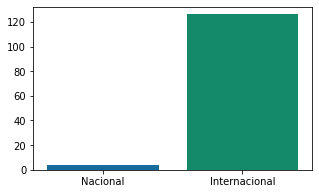

In [85]:
plt.figure(figsize=(5,3))
sns.countplot(df['CO_MOBILIDADE_ACADEMICA'])
plt.xticks(ticks=[0,1], labels=['Nacional','Internacional'])
plt.xlabel("")
plt.ylabel("");

In [86]:
df['CO_MOBILIDADE_ACADEMICA_INTERN'].value_counts()

1.0    130
2.0     64
Name: CO_MOBILIDADE_ACADEMICA_INTERN, dtype: int64

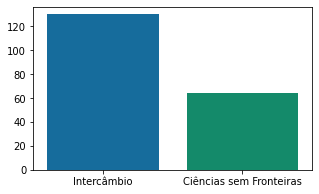

In [87]:
plt.figure(figsize=(5,3))
sns.countplot(df['CO_MOBILIDADE_ACADEMICA_INTERN'])
plt.xticks(ticks=[0,1], labels=['Intercâmbio','Ciências sem Fronteiras'])
plt.xlabel("")
plt.ylabel("");

Em 2016, 135 alunos estavam fora do Brasil em programas de mobilidade acadêmica e apenas 5 estavam em programas de mobilidade dentro do próprio país.

Dos alunos que estavam com vínculo temporário em instituição internacional, a maior parte deles estava de intercâmbio (143) e outros no Programa Ciências sem Fronteiras (77).

## 6. Conclusão

Eu tinha algumas perguntas em mente antes de iniciar as análises, algumas eu consegui responder, outras preciso de mais dados e estudar um pouco mais para responder. Por vezes eu tive surpresas com os dados e outras vezes esses dados apenas representaram a desigualdade existente no país.

Eu ainda tenho vontade de investigar: 
* Quantos alunos que entram em algum curso e quantos de fato formam;
* Dentre os que abandonam, em qual ponto do curso eles abandonam;
* Qual porcentagem de alunos é jubilada;
* Quantas pessoas conseguem se manter na sua cidade natal para estudar;
* Cruzar data de autorização do curso com a data de início do funcionamento do curso;
* Verificar se os dados de acessibilidade são melhores em universidades públicas ou particulares.